In [1]:
import pyclesperanto_prototype as cle
import numpy as np
from skimage.io import imshow
import matplotlib

# Generate artificial cells as test data

c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:252: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "
c:\users\rober\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


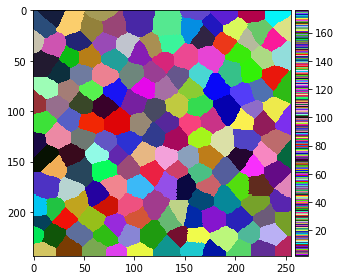

In [2]:
tissue = cle.artificial_tissue_2d()

cmap = matplotlib.colors.ListedColormap ( np.random.rand ( 256,3))
imshow(cle.pull_zyx(tissue), cmap=cmap)

c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:252: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


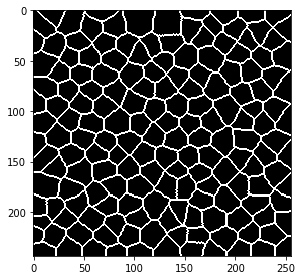

In [3]:
membranes = cle.detect_label_edges(tissue)
imshow(cle.pull_zyx(membranes))

# Analysis and visualization of neighbor count

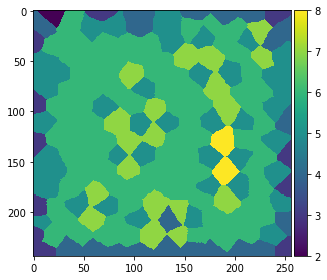

In [4]:
touch_matrix = cle.generate_touch_matrix(tissue)
neighbor_count = cle.count_touching_neighbors(touch_matrix)

parametric_image = cle.replace_intensities(tissue, neighbor_count)
imshow(cle.pull_zyx(parametric_image))


[[0.        0.        4.        0.        4.75      0.        0.
  0.        5.        4.8       4.8       4.5       4.2000003 4.5714283
  5.166667  4.8333335 5.2000003 5.        5.428571  5.285714  5.428571
  5.        4.6       4.5       5.1428566 5.8571424 5.7142854 5.5714283
  5.428571  5.8333335 6.166667  5.8571424 6.166667  5.4       5.
  5.7142854 5.9999995 6.1428566 6.1428566 5.9999995 5.875     6.
  5.9999995 5.625     5.        0.        5.5       5.8571424 6.1428566
  6.        5.9999995 5.9999995 6.3333335 6.166667  5.8571424 5.666667
  5.        5.7142854 5.8571424 6.1428566 6.166667  5.9999995 5.9999995
  6.125     6.1428566 5.5714283 5.        4.75      5.285714  5.8571424
  6.        6.1428566 5.875     5.9999995 6.1428566 6.25      5.8571424
  5.3333335 4.8333335 5.8571424 5.9999995 6.        6.5       6.166667
  5.7142854 6.3333335 6.3333335 5.285714  5.        4.75      5.285714
  5.9999995 6.1428566 6.125     6.        5.9999995 5.9999995 6.111111
  5.8571424 5.    

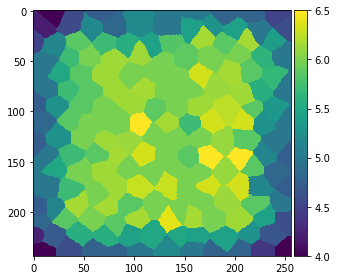

In [5]:
local_mean_neighbor_count = cle.mean_of_touching_neighbors(neighbor_count, touch_matrix)

print(local_mean_neighbor_count)

parametric_image = cle.replace_intensities(tissue, local_mean_neighbor_count)
imshow(cle.pull_zyx(parametric_image))
